In [1]:
#Importazione file json

In [2]:
import pandas as pd

In [3]:
df_maps = pd.read_json("Mappa-dei-pub-circoli-locali-in-Italia.json", encoding="latin-1")

In [6]:
df_maps.info()
#2497 righe, 9 colonne
#metadati

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ccomune                           2497 non-null   object 
 1   cprovincia                        2497 non-null   object 
 2   cregione                          2497 non-null   object 
 3   cnome                             2497 non-null   object 
 4   canno_inserimento                 2497 non-null   int64  
 5   cdata_e_ora_inserimento           2497 non-null   object 
 6   cidentificatore_in_openstreetmap  2497 non-null   int64  
 7   clongitudine                      2497 non-null   float64
 8   clatitudine                       2497 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 175.7+ KB


In [8]:
df_maps.size
#22473 valori

22473

In [10]:
#primo elemento
df_maps.head(1)

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583


In [12]:
#stampiamo l'ultimo elemento
df_maps.tail(1)

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
2496,Trani (BT),BARLETTA ANDRIA TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264


In [13]:
#stampare un elemento a caso
df_maps.sample()

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
1532,Ancona,ANCONA,Marche,Pacio's pub,2016,2016-02-14T23:11:10Z,659630576,13.507111,43.604416


In [29]:
#anni di inserimento presenti
len(df_maps["canno_inserimento"].unique())

10

In [35]:
#quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46?

mask = (((df_maps["clongitudine"]>=9) & (df_maps["clongitudine"]<=10)) 
& ((df_maps["clatitudine"]>=45) & (df_maps["clatitudine"]<=46)))

In [36]:
len(df_maps.loc[mask])

303

In [37]:
#quante attività ci sono nella provincia di Vicenza?
mask2 = df_maps["cprovincia"].str.upper() == "VICENZA"

In [39]:
len(df_maps.loc[mask2])

73

In [40]:
#quante enoteche ci sono, e come si chiamano?
mask3 = df_maps["cnome"].str.upper().str.contains("ENOTE")

In [44]:
len(df_maps.loc[mask3])

6

In [46]:
#quante attività ci sono in Lazio e Abruzzo assieme?
mask4= (
        (df_maps["cregione"].str.upper() == "ABRUZZO")
        |
        (df_maps["cregione"].str.upper() == "LAZIO")
       )

## INSURANCE

In [47]:
df_ins = pd.read_csv("C://Users//bulan//OneDrive//Desktop//sql_pandas//insurance.csv")
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


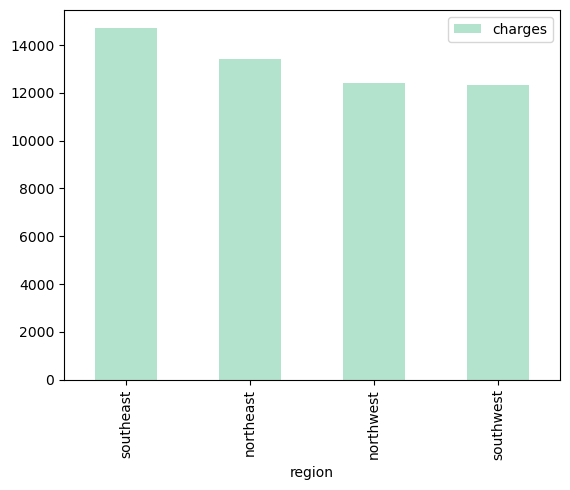

In [49]:
#media charges per region
(df_ins.groupby("region")[["charges"]].mean()
     .sort_values(by="charges", ascending=False)
     .plot.bar(cmap="Pastel2")
);

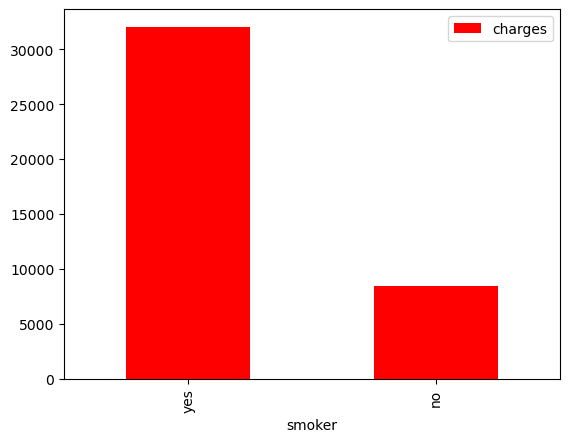

In [51]:
(df_ins.groupby("smoker")[["charges"]].mean()
     .sort_values(by="charges", ascending=False)
     .plot.bar(cmap="flag")
);

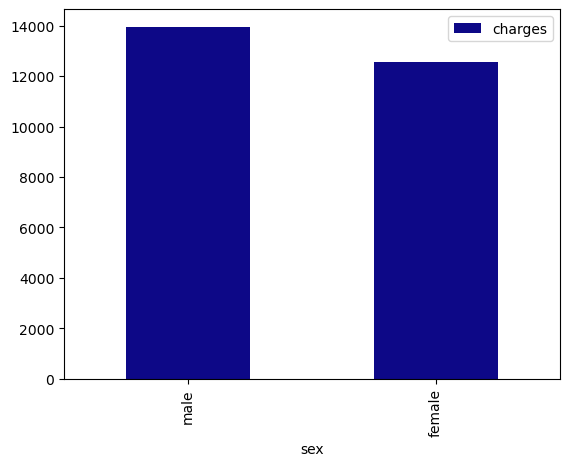

In [52]:
(df_ins.groupby("sex")[["charges"]].mean()
     .sort_values(by="charges", ascending=False)
     .plot.bar(cmap="plasma")
);

In [53]:
##Quali sono i descrittori statistici di bmi? 
##Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi?

<Axes: ylabel='Frequency'>

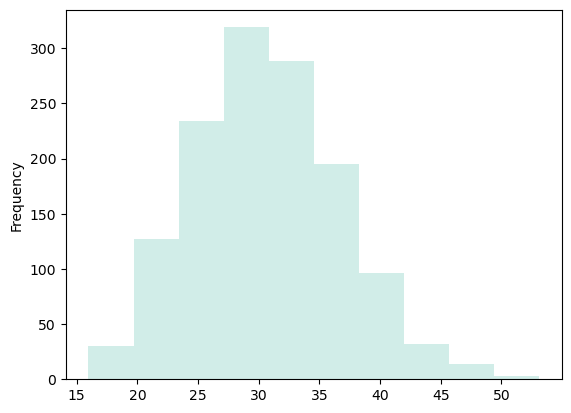

In [54]:
#la media dei valori di bmi si colloca fra 25 e 35 bmi
df_ins["bmi"].plot.hist(cmap="Set3", alpha = 0.4)

In [55]:
bmi_min = df_ins["bmi"].min() 
bmi_max = df_ins["bmi"].max()
bmi_min, bmi_max

(15.96, 53.13)

In [58]:
#troviamo i quartili, l'iqr il max e il min bin
import numpy as np
q25, q50, q75 = np.percentile(df_ins["bmi"], [25, 50, 75])
iqr = q75 - q25
min_bin = q25 - 1.5*iqr
max_bin = q50 + 1.5*iqr

In [59]:

print("Il valore minimo dei bin è pari a ",bmi_min)
print("Il valore massimo dei bin è pari a ",bmi_max)
print(f"I quartili sono distribuiti da Q1 a Q3 nel seguente modo: {q25}, {q50}, {q75}")

Il valore minimo dei bin è pari a  15.96
Il valore massimo dei bin è pari a  53.13
I quartili sono distribuiti da Q1 a Q3 nel seguente modo: 26.29625, 30.4, 34.69375


## IRIS

In [60]:
df_iris = pd.read_csv("Iris.csv")

In [61]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
df_iris.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


In [63]:
#Media della lunghezza dei petali di tutto il dataset
df_iris["PetalLengthCm"].mean()


3.758666666666666

In [68]:
##La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby()
df_iris.groupby("Species").agg({"PetalLengthCm":"mean"})

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [73]:
## Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()
df_iris.groupby("Species").agg({"PetalWidthCm":["mean","min","max"]}).droplevel(0, axis=1)

,mean,min,max
Species,,,
Iris-setosa,0.244,0.1,0.6
Iris-versicolor,1.326,1.0,1.8
Iris-virginica,2.026,1.4,2.5


## Wine

In [77]:
df_wine = pd.read_csv("winequality_red.csv")

In [79]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


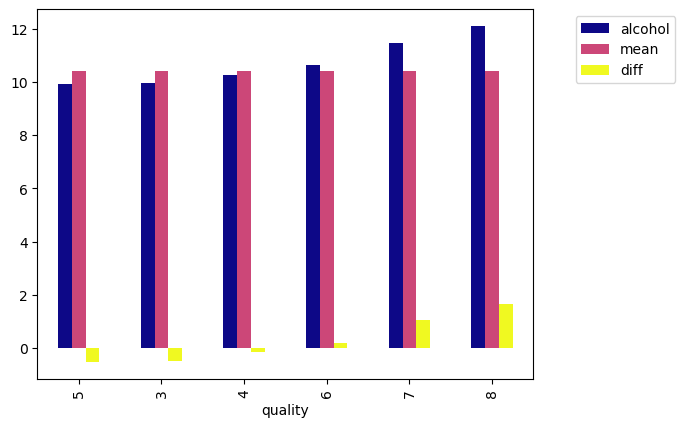

In [106]:
#Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale?
(df_wine.groupby("quality")[["alcohol"]].mean()
 .sort_values(by="alcohol")
 .assign(mean = df_wine["alcohol"].mean(),
         diff = lambda x: (x["alcohol"]-x["mean"])
        )
).plot.bar(cmap = "plasma").legend(bbox_to_anchor=(1.3,1))


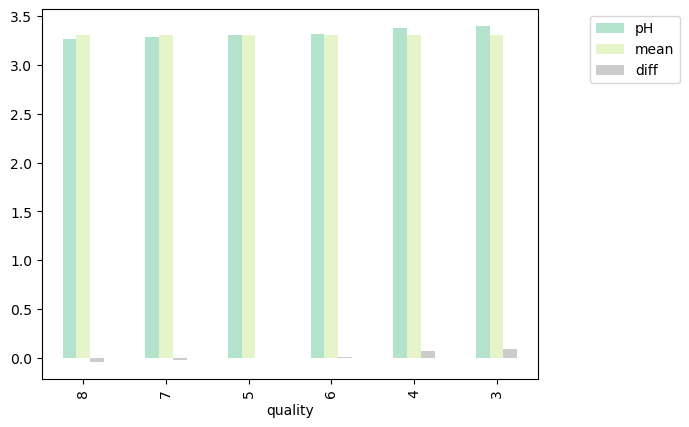

In [110]:
#Qual è la media di pH per ogni qualità? Ci sono differenze? E rispetto alla media totale?
(df_wine.groupby("quality")[["pH"]].mean()
 .sort_values(by="pH")
 .assign(mean = df_wine["pH"].mean(),
         diff = lambda x: (x["pH"]-x["mean"])
        )
).plot.bar(cmap="Pastel2").legend(bbox_to_anchor=(1.3,1))

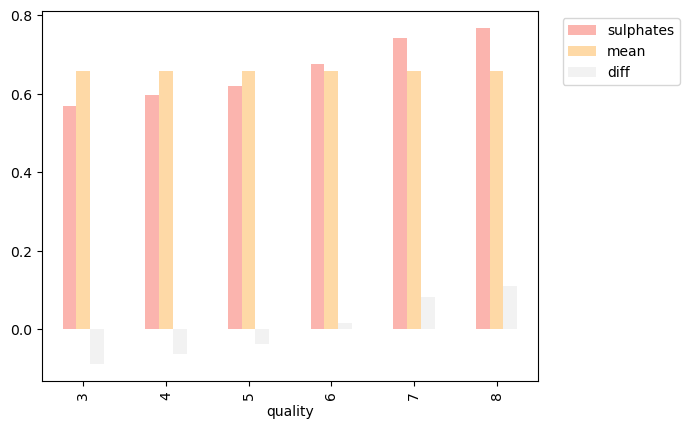

In [104]:
(df_wine.groupby("quality")[["sulphates"]].mean()
 .sort_values(by="sulphates")
 .assign(mean = df_wine["sulphates"].mean(),
         diff = lambda x: (x["sulphates"]-x["mean"])
        )
).plot.bar(cmap = "Pastel1").legend(bbox_to_anchor=(1.3,1))

## BOSTON

In [115]:
df_boston = pd.read_csv("HousingData.csv")

In [116]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [117]:
## La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?
df_boston.groupby("CHAS")["MEDV"].mean()

CHAS
0.0    22.215044
1.0    28.826471
Name: MEDV, dtype: float64

In [120]:
## Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato?
df_boston.loc[:,["CRIM", "MEDV"]].corr()


,CRIM,MEDV
CRIM,1.000000,-0.391363
MEDV,-0.391363,1.000000


<Axes: xlabel='CRIM', ylabel='MEDV'>

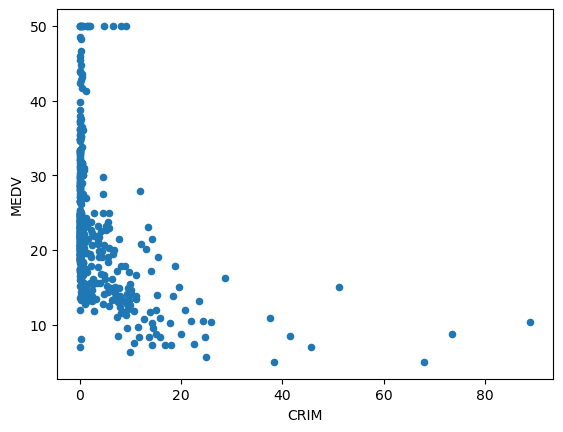

In [122]:
df_boston.loc[:,["CRIM", "MEDV"]].plot.scatter(x="CRIM", y="MEDV")

In [123]:
## Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? ù
## E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato?

In [127]:
df_ratio_stanze = df_boston.groupby("PTRATIO", as_index=False)[["RM"]].mean()

In [128]:
df_ratio_stanze.corr()

,PTRATIO,RM
PTRATIO,1.000000,-0.721341
RM,-0.721341,1.000000


<Axes: xlabel='PTRATIO', ylabel='RM'>

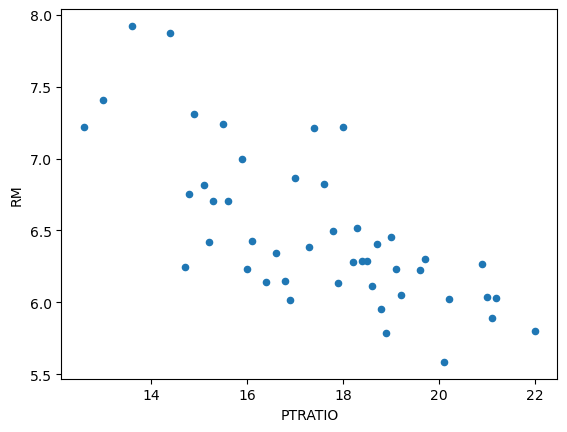

In [131]:
df_ratio_stanze.plot.scatter(x="PTRATIO", y="RM")

In [134]:
df_ratio_case = df_boston.groupby("PTRATIO", as_index=False)[["MEDV"]].mean()

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

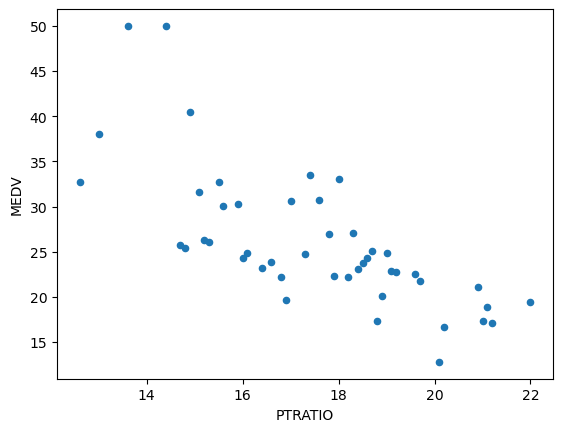

In [137]:
df_ratio_case.plot.scatter(x="PTRATIO", y="MEDV")

## MERGE

In [138]:
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 'department_id': [1, 2, 1, 2, 3] })

In [139]:
departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 'department_name': ['HR', 'IT', 'Finance'], 'location': ['New York', 'San Francisco', 'Chicago'] })

In [140]:
employees_df

,employee_id,name,department_id
0,101,Alice,1
1,102,Bob,2
2,103,Charlie,1
3,104,David,2
4,105,Emma,3


In [141]:
departments_df

,department_id,department_name,location
0,1,HR,New York
1,2,IT,San Francisco
2,3,Finance,Chicago


In [144]:
df_all = employees_df.merge(departments_df, how="left", left_on="department_id", right_on="department_id")

In [145]:
df_all

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,102,Bob,2,IT,San Francisco
2,103,Charlie,1,HR,New York
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago
